Author: Yang
Date: 04/22/2016

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
%matplotlib inline

In [8]:
county_area = pd.read_csv(r"..\..\data\drought_monitor\county_area.csv")
county_area.head()

GISJOIN         AREA           X          Y
0  G0200130  7032.737436 -161.993658  55.363561
1  G0200160  4404.152728 -107.656871  52.808638
2  G2801070   705.131640  -89.950567  34.363935
3  G2801010   579.601937  -89.118809  32.400232
4  G2800270   583.152399  -90.602687  34.229166

In [17]:
coeff = pd.read_csv(r"../../code/analysis_stage2/combined_inputs/combined_acs_epa_betas.csv ")
coeff.rename(columns ={'countyID':'GISJOIN'},inplace = True)
coeff.head()
matching = [s for s in coeff.columns.values if "coeff" in s]
matching

['coeff_r_12_p_13',
 'coeff_r_12_p_14',
 'coeff_r_12_p_15',
 'coeff_r_24_p_13',
 'coeff_r_24_p_14',
 'coeff_r_24_p_15',
 'coeff_r_25_p_13',
 'coeff_r_25_p_14',
 'coeff_r_25_p_15',
 'coeff_r_26_p_13',
 'coeff_r_26_p_14',
 'coeff_r_26_p_15',
 'coeff_r_27_p_13',
 'coeff_r_27_p_14',
 'coeff_r_27_p_15',
 'coeff_r_6_p_13',
 'coeff_r_6_p_14',
 'coeff_r_6_p_15']

In [35]:
name = pd.read_csv('../../code/analysis_stage1/namesCombinedOrder.txt',sep ='"',header =None)
name_clean =name[[1,3,5,7,9]]
name_list = name_clean.as_matrix().reshape((name_clean.as_matrix().size,1)).tolist()

13


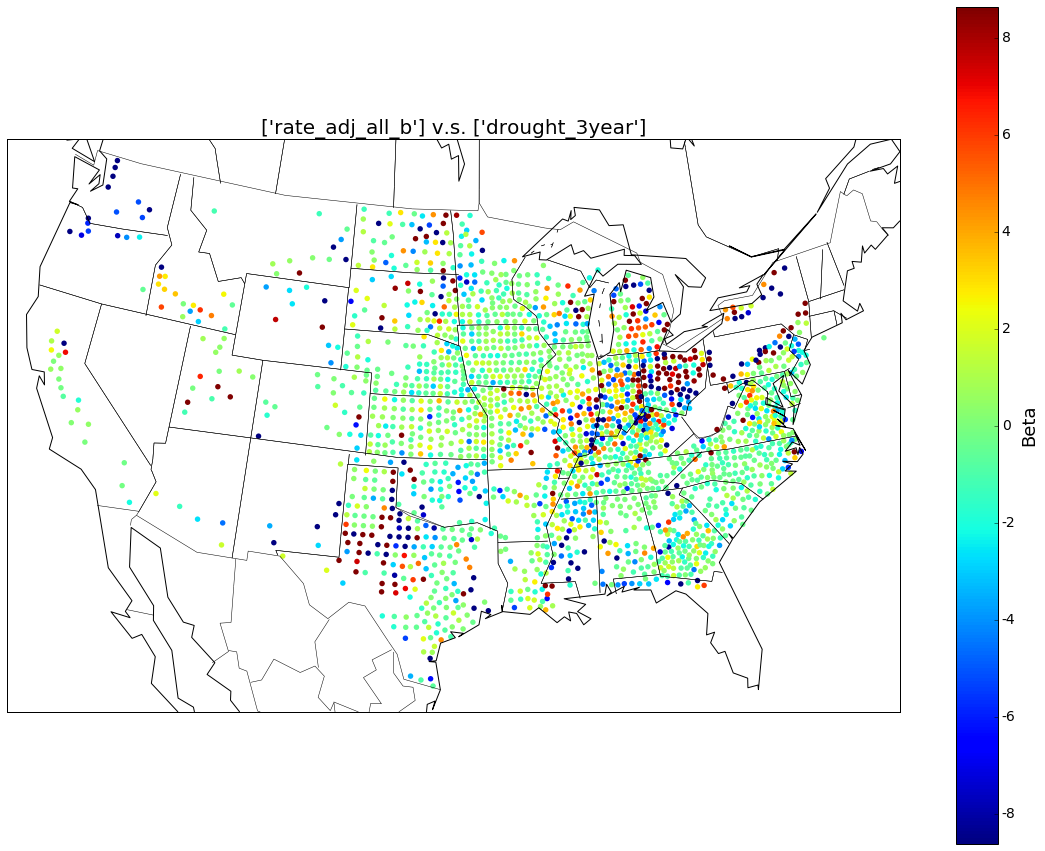

14


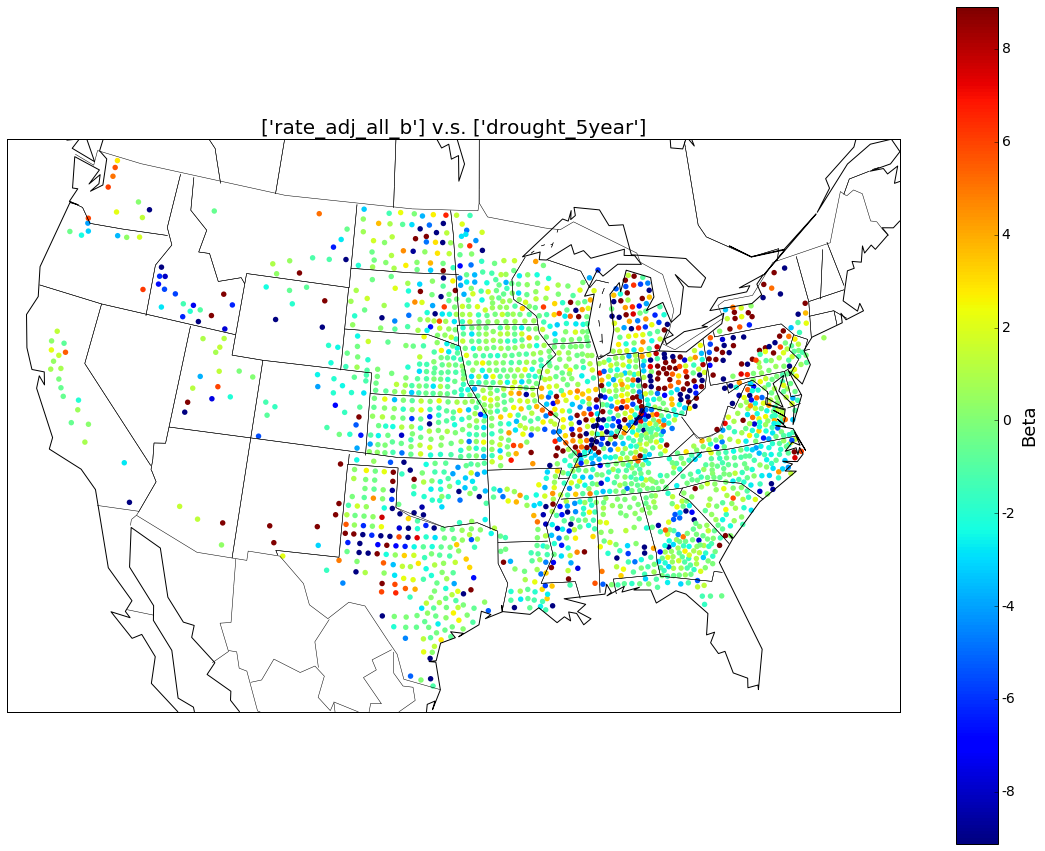

15


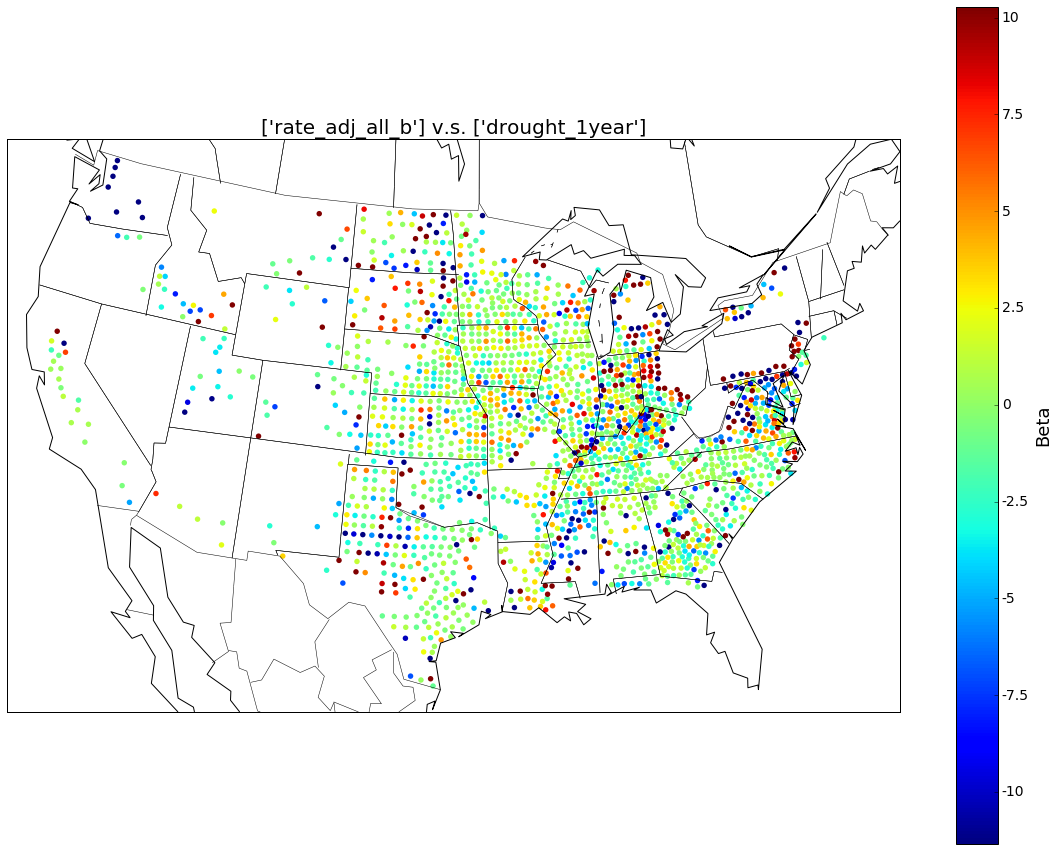

13


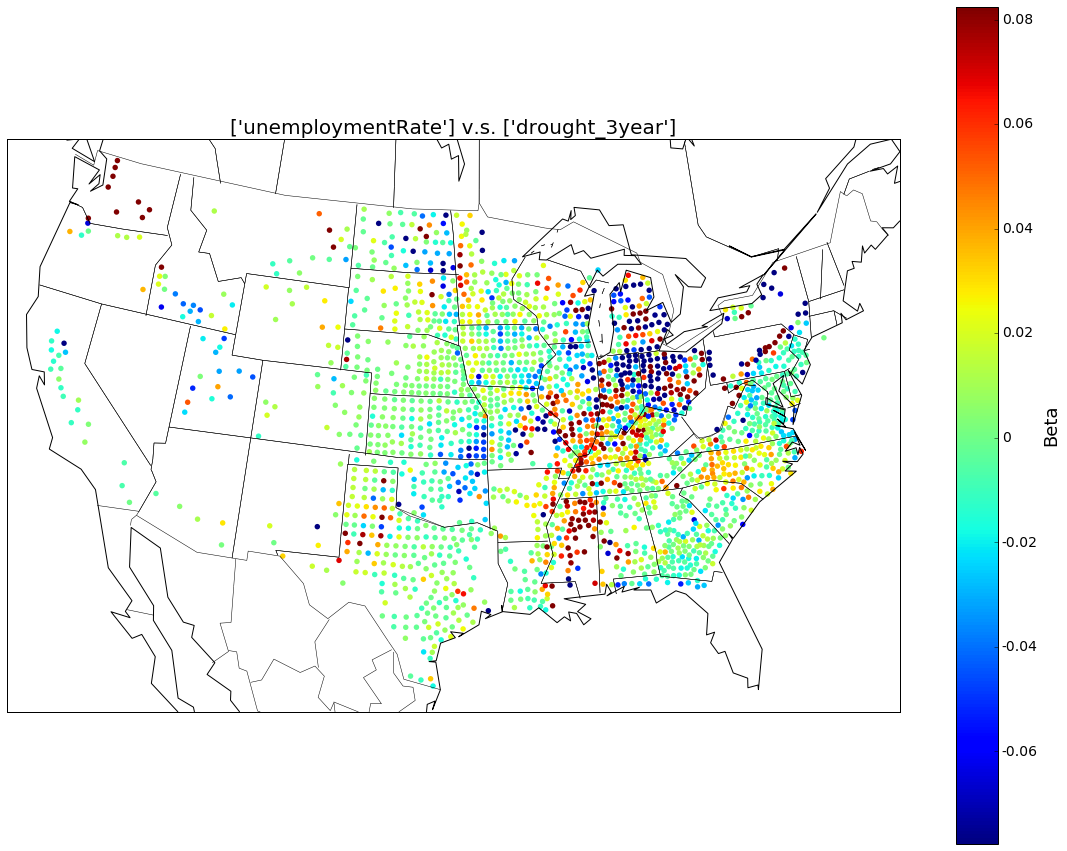

14


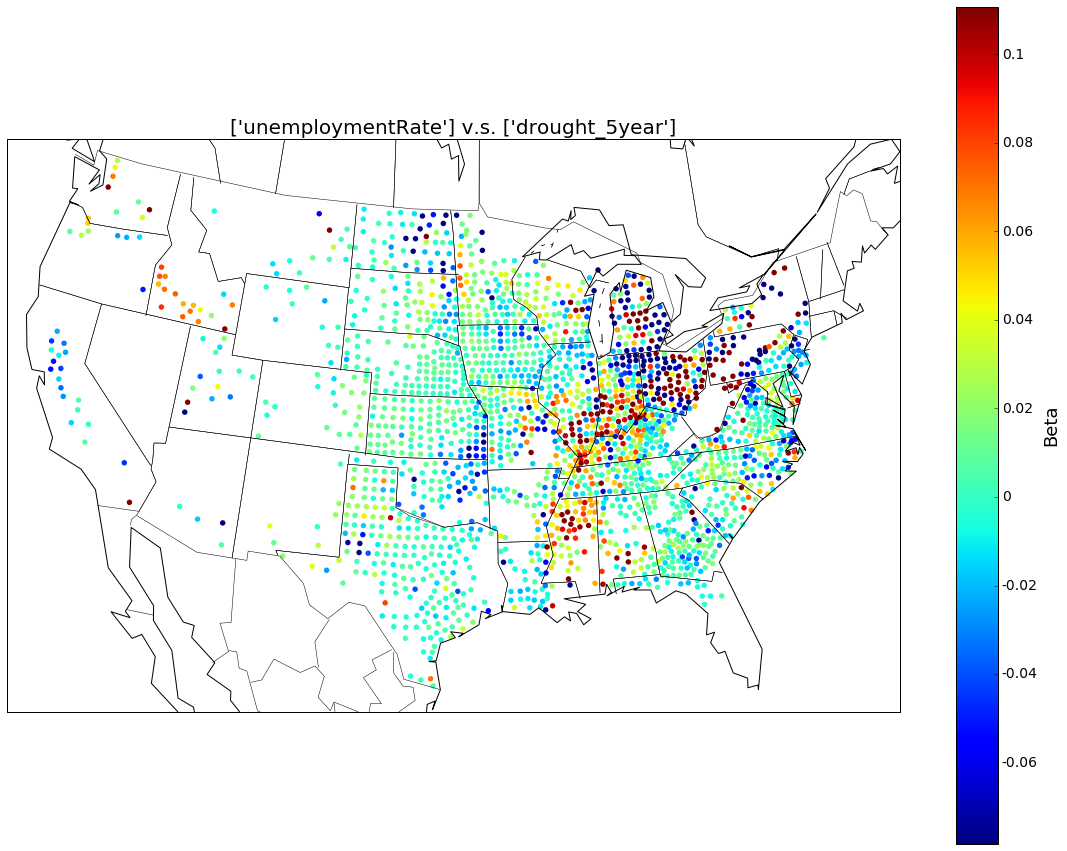

15


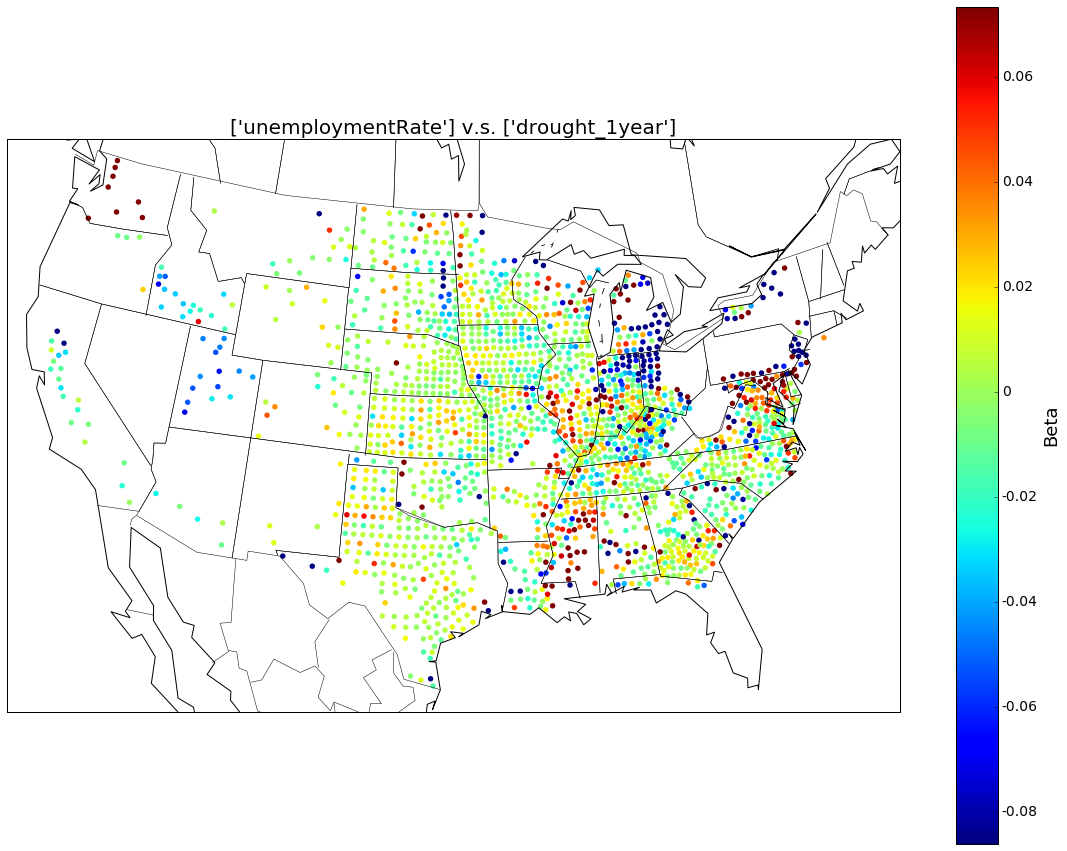

13


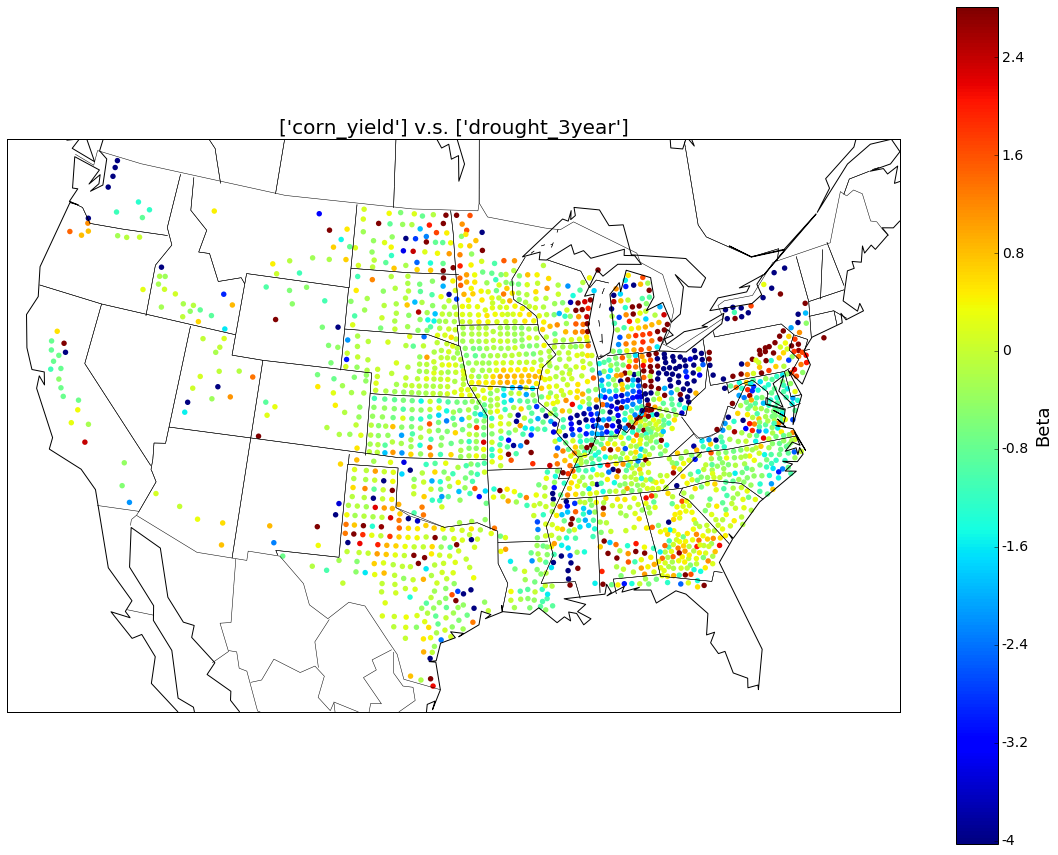

14


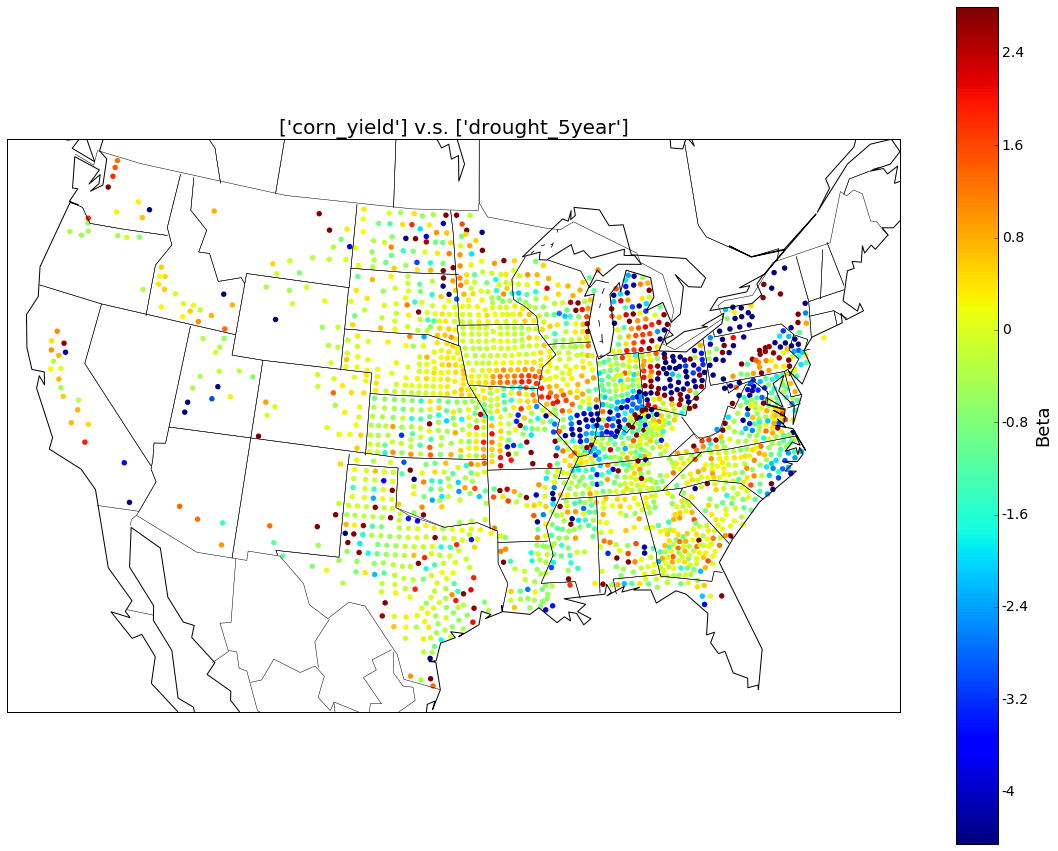

15


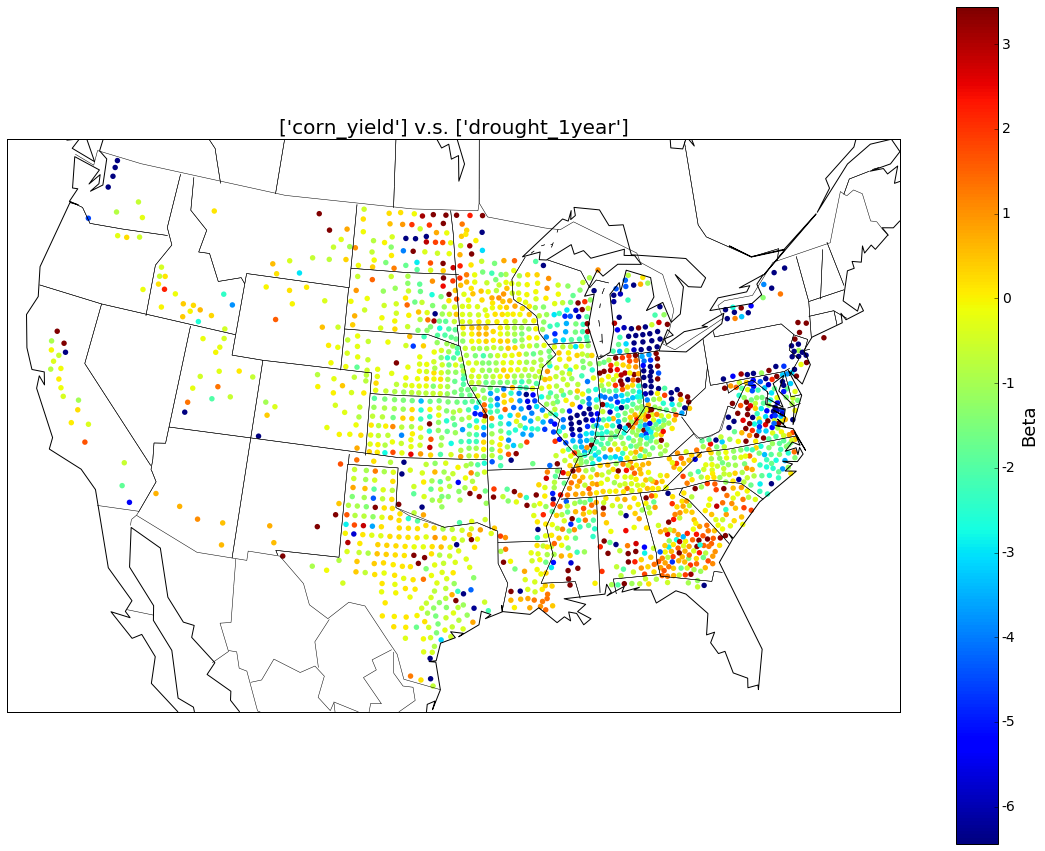

13


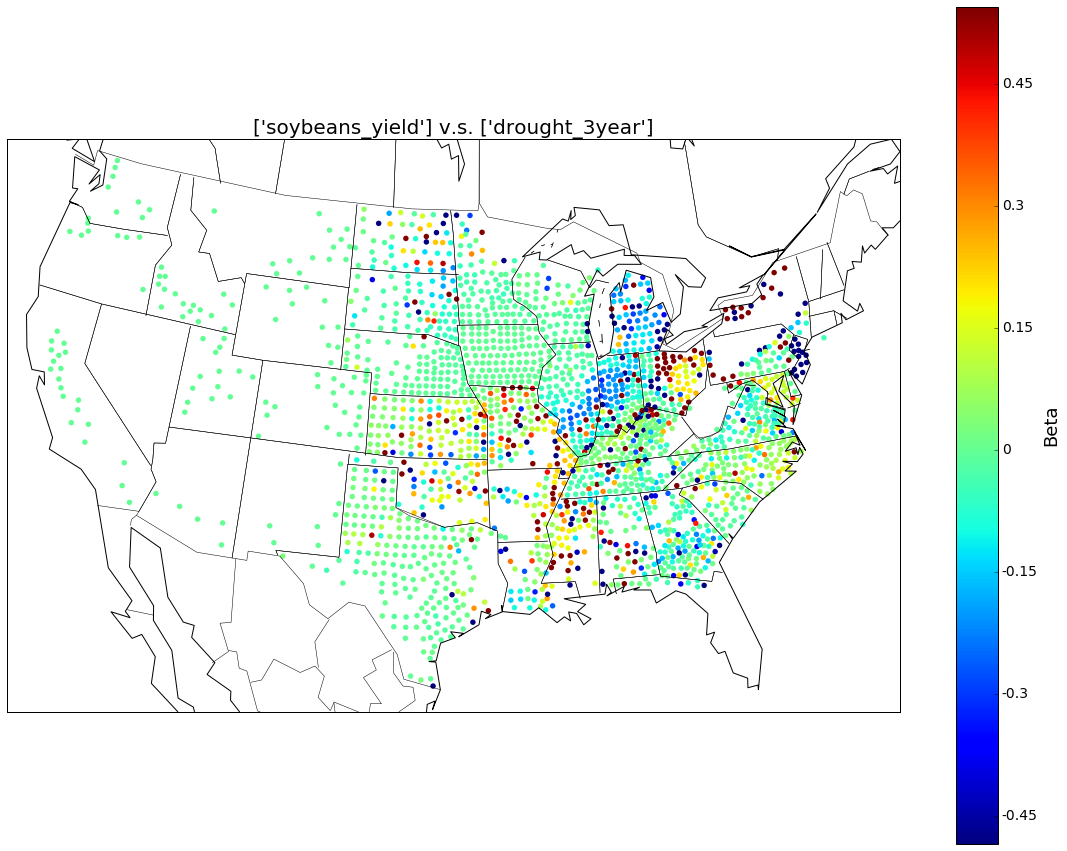

14


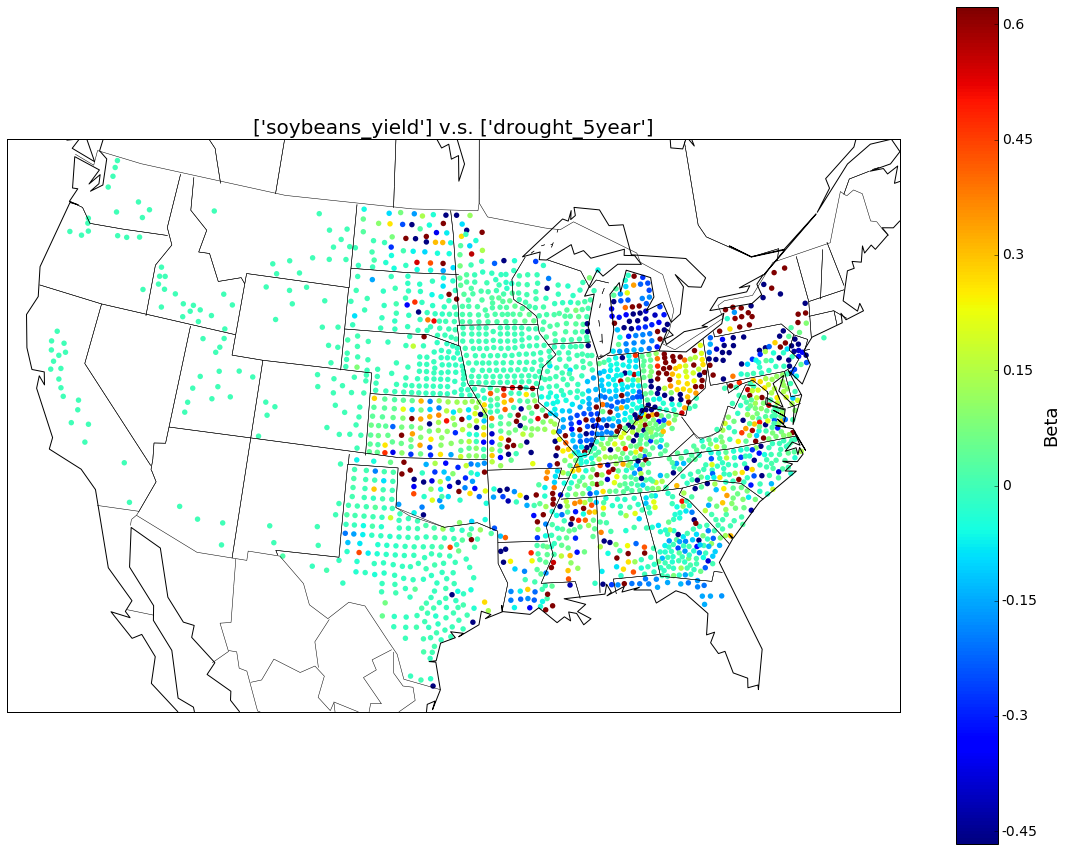

15


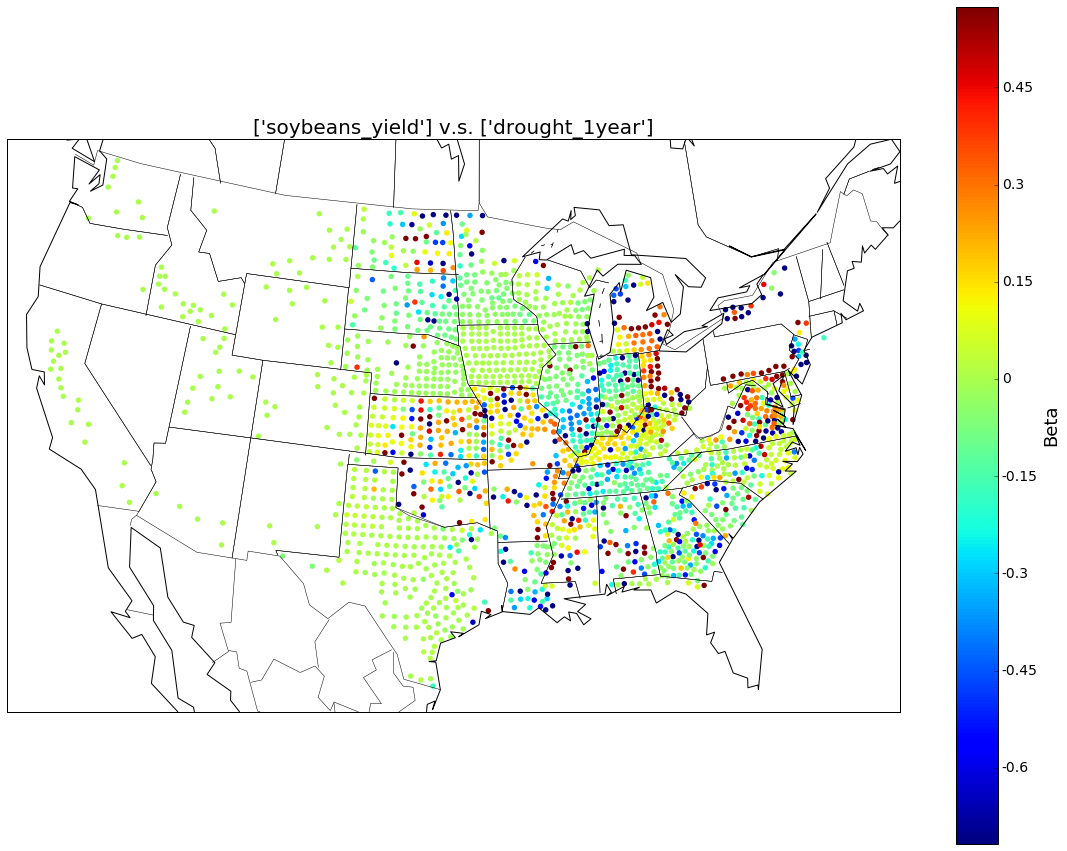

13


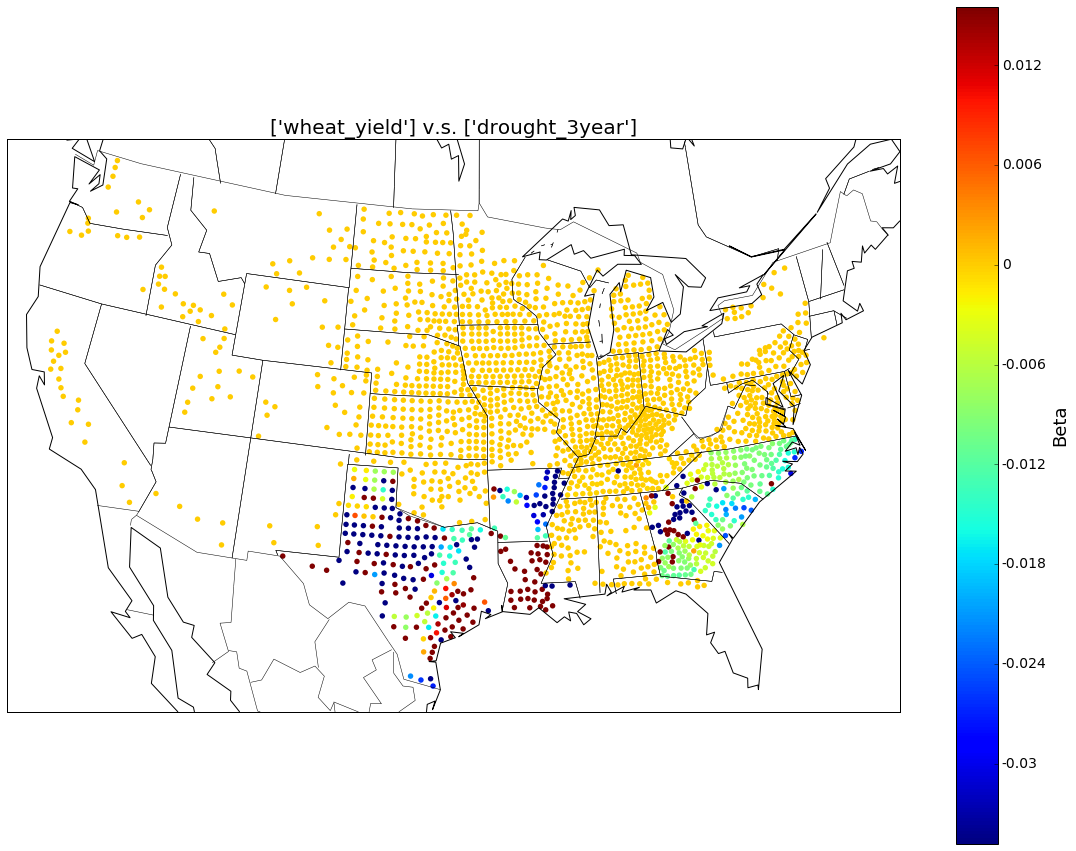

14


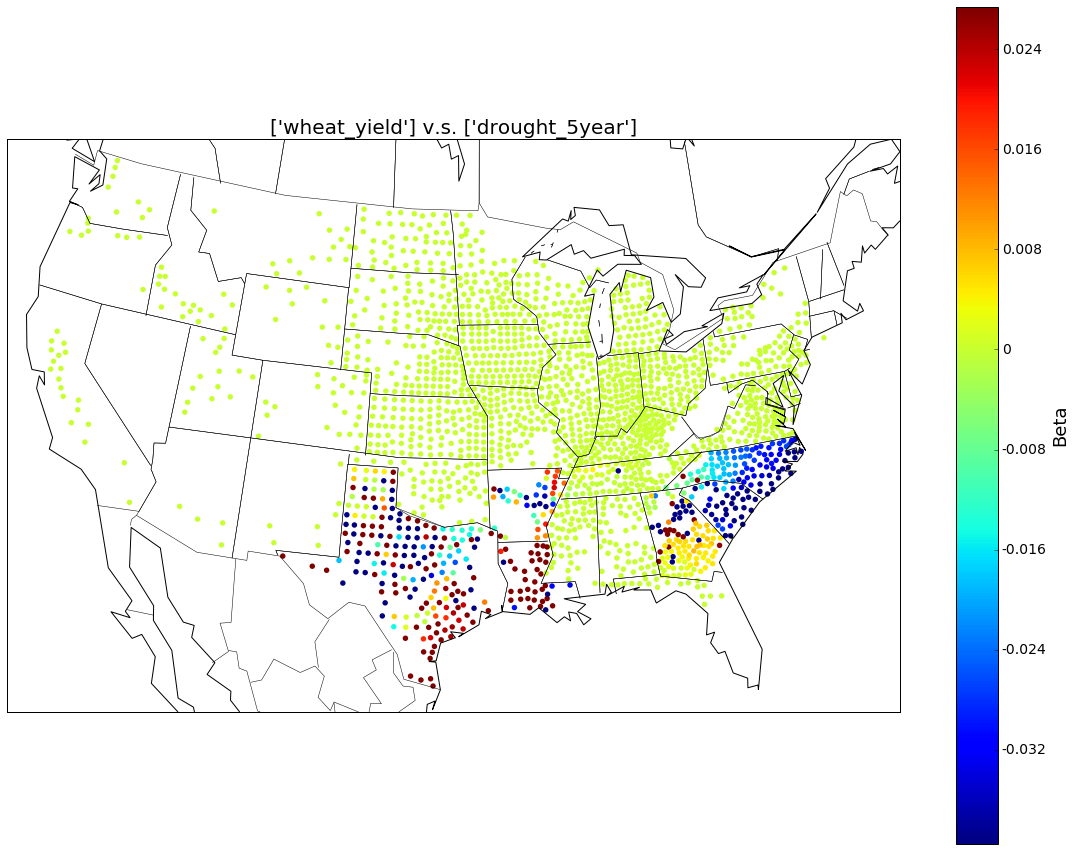

15


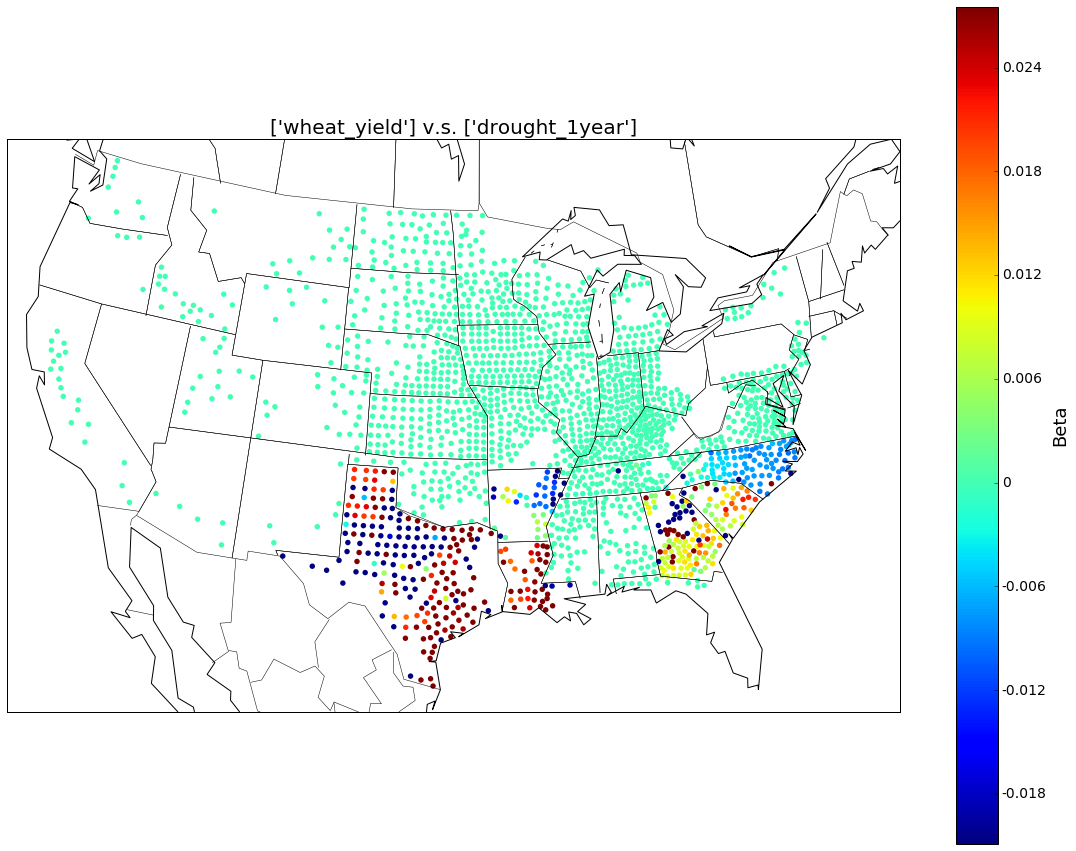

13


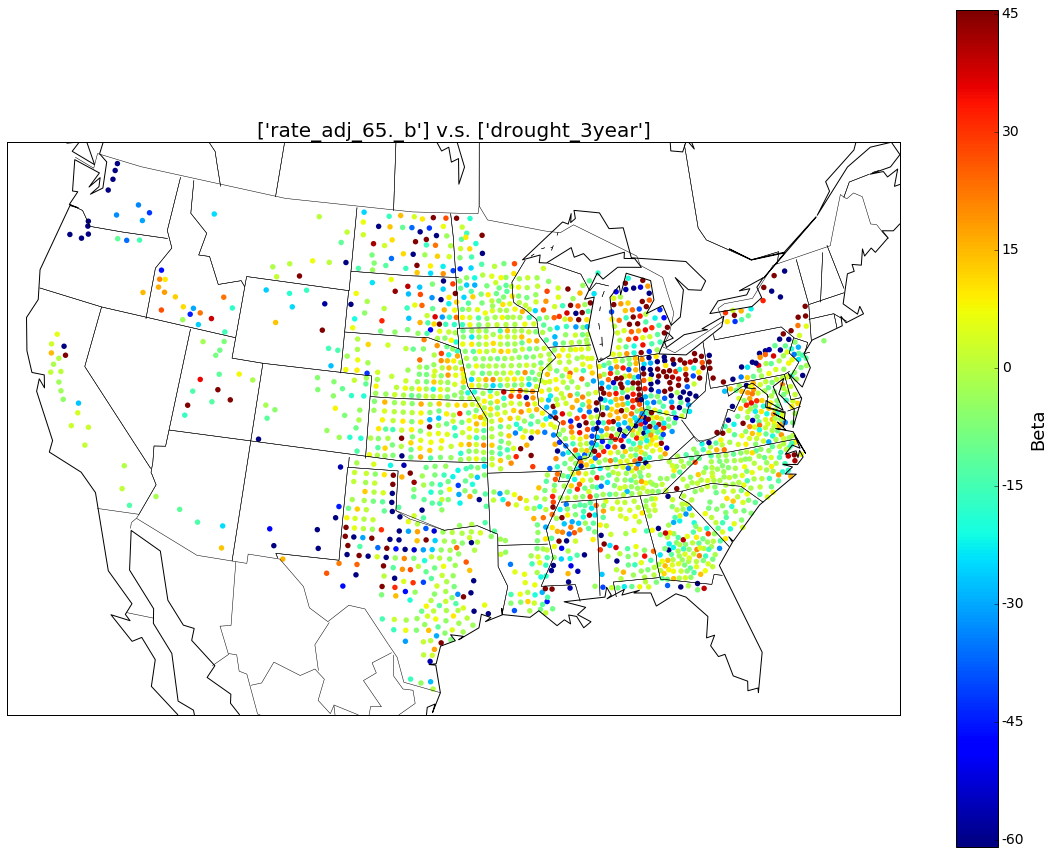

14


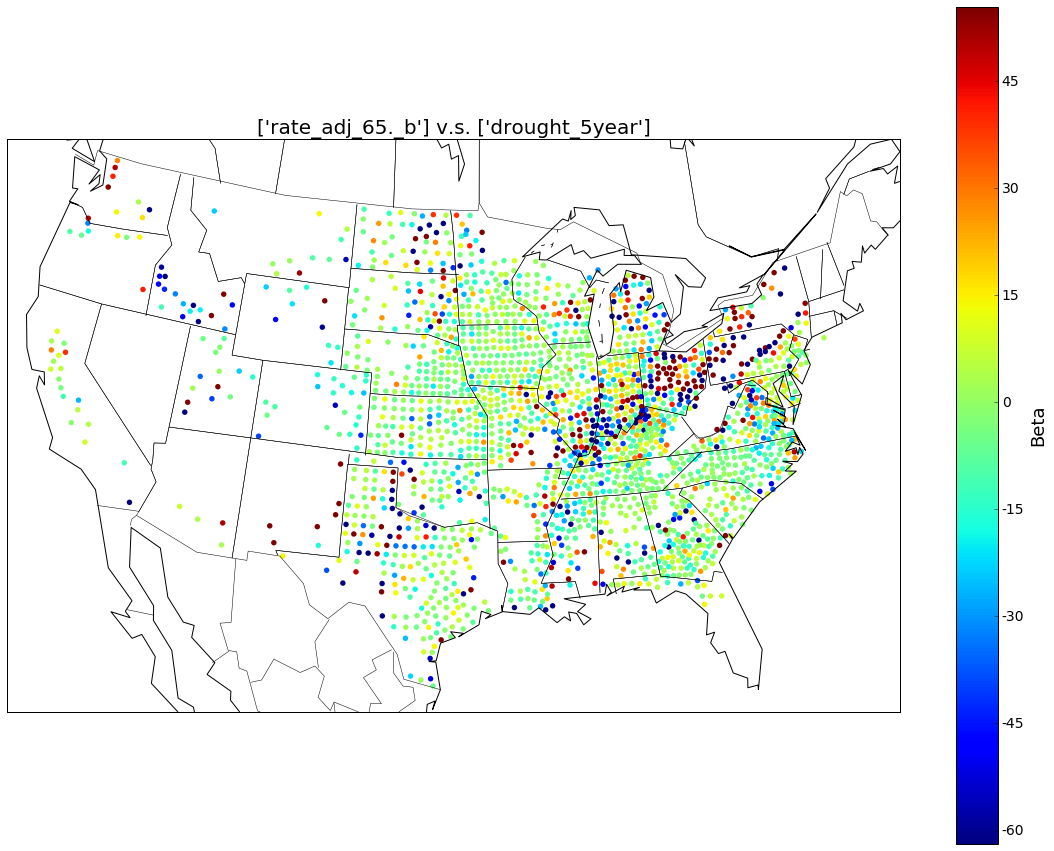

15


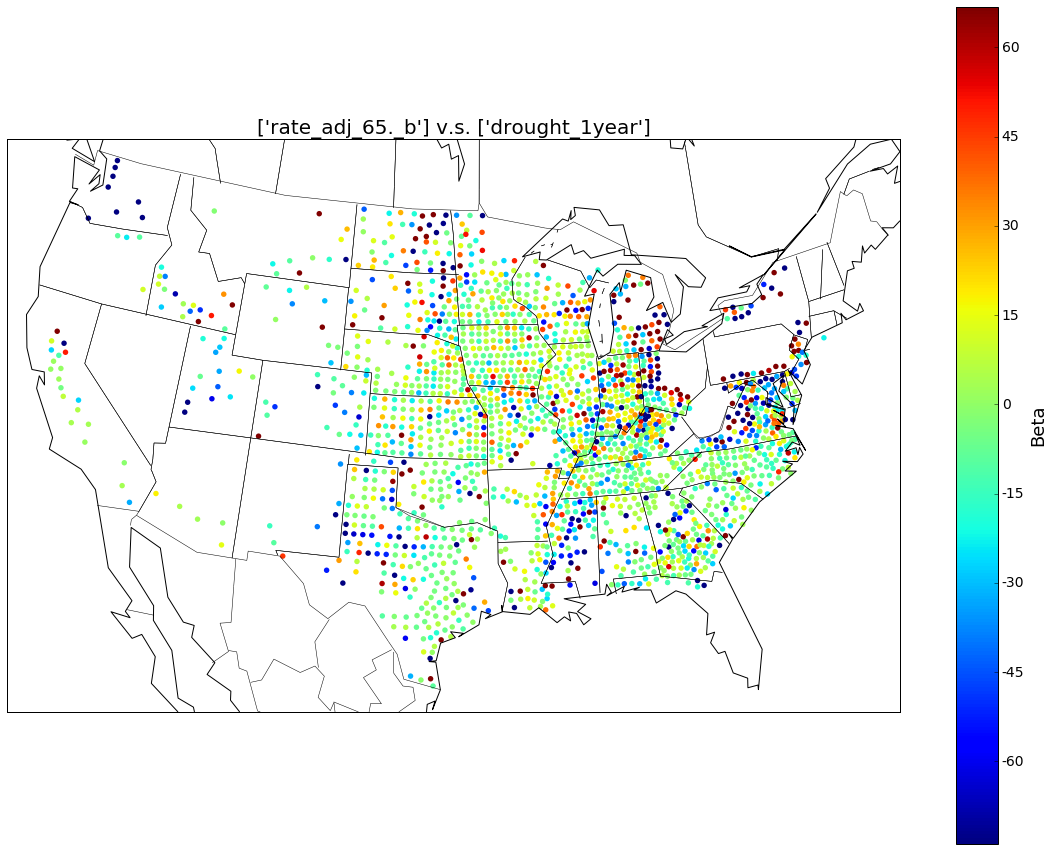

In [51]:
combined = pd.DataFrame()
combined = county_area*1
combined = combined.merge(coeff,on='GISJOIN')

for name in matching:
    r = int(name[name.find("r_")+2:name.find("_p")])
    p = int(name[name.find("p_")+2:])
    print(p)
    plt.figure(figsize=(20,15))
    # setup Lambert Conformal basemap.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    combined_clean = combined[['X','Y',name]].dropna()
    x,y = m(combined_clean['X'].values, combined_clean['Y'].values)
    m.scatter(x, y, s =30,c = combined_clean[name],cmap='jet',vmin=combined[name].quantile(0.05), vmax=combined[name].quantile(0.95),edgecolors ='None')
    # draw coastlines.
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
    c = plt.colorbar(orientation='vertical',format='%1.2g')
    c.set_label("Beta",fontsize=18)
    c.ax.tick_params(labelsize=14)
    plt.title("%s v.s. %s"%(name_list[r-1],name_list[p-1]),fontsize=20)
    plt.savefig(r'..\..\paper\figures\scatter_%s'%name,dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()

In [5]:
combined.describe().to_csv(r'..\..\paper\summary_stats_stage1.csv')

TypeError: can't multiply sequence by non-int of type 'float'